### **MATHEMATICS BEHIND GRADIENT BOOSTING REGRESSION**

![gradient_boosting](1.png)

### **ADDITIVE MODELLING**
- Additive modelling is summing the multiple functions to create the actual function to fit on the data.

In [1]:
datafram2={
    'R&D Spend':[165.0,101,29],
    'Adminstration':[137.0,92,127],
    'Marketing Spend':[472.0,250,201],
    'Profit':[192.0,144,91]
}
import pandas as pd
import numpy as np
df=pd.DataFrame(datafram2)

In [2]:
df

R&D Spend  Adminstration  Marketing Spend  Profit
0      165.0          137.0            472.0   192.0
1      101.0           92.0            250.0   144.0
2       29.0          127.0            201.0    91.0

- Here we will use the least square loss funtion. Here we multiply by half for mathematical convinience.
- The loss function used any should be differentiable.

**First step**
- $f_0(x)=argmin\frac{1}{2}\sum_{i=1}^m(y_i-\gamma)^2$
$$\frac{df_0(x)}{d\gamma}=-\sum_{i=1}^m(y_i-\gamma)\frac{d}{d\gamma}(y_i-\gamma)\\
=0
$$


- for out dataset above
$$
\sum_{i=1}^3=0\\
(\gamma-192)+(\gamma-91)+(\gamma-29)=0\\
3\gamma=192+144+91\\
\gamma=\frac{192+144+91}{3}\\
$$
- Thus $f_o(x)$ will be the mean of the output column.


**For the second step**
- When finding the second function compostie of the smaller functions,
    * we have already found the first function as mean
    * The further functions are calculated as mean of others.
- 2.a For all the rows in the dataset we need to calculate
    * $r_{im}=-\left[\frac{\delta L(y_i,f(x_i))}{\delta f(x_i)}\right]_{f=f_{m-1}}$
    * $f(x_i)$=$\hat{y_i}$
    * $r_{i1}=-\left[\frac{\delta}{\delta \hat{Y_i}} \frac{1}{2}(y_i-\bar{y_i})\right]$
    * = $[(y_{i}-\hat{y_i})]$
    * $r_{11}=y_1-f_o(x_1)=192-142$
    * $r_{31}=y_1-f_o(x_3)=29-142$
    * $r_{21}=y_1-f_o(x_2)=144-142$


In [3]:
df['f_o(x)']=df['Profit'].mean()

In [4]:
df

R&D Spend  Adminstration  Marketing Spend  Profit      f_o(x)
0      165.0          137.0            472.0   192.0  142.333333
1      101.0           92.0            250.0   144.0  142.333333
2       29.0          127.0            201.0    91.0  142.333333

In [5]:
df['ri1']=df['Profit']-df['f_o(x)']

In [6]:
df

R&D Spend  Adminstration  Marketing Spend  Profit      f_o(x)        ri1
0      165.0          137.0            472.0   192.0  142.333333  49.666667
1      101.0           92.0            250.0   144.0  142.333333   1.666667
2       29.0          127.0            201.0    91.0  142.333333 -51.333333

In [7]:
''' 
the regression tree is fitted to the residual function.
'''
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(max_depth=1)


[Text(0.5, 0.75, 'x[2] <= 225.5\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 576.0\nsamples = 2\nvalue = 25.667'),
 Text(0.625, 0.5, '  False')]

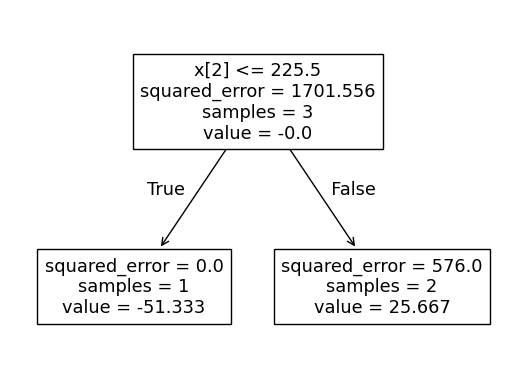

In [8]:
dt1.fit(df.iloc[:,0:3].values,df['ri1'].values)
from sklearn.tree import plot_tree
plot_tree(dt1)


**For2.c**
- $\gamma _{jm}=argmin\sum_{x_i}\in L(y_i,f_{m-1}(x_i)+\gamma)$
- $\gamma_{11}=argmin \sum_{x_i\in R_{11}} L(y_i,f_{m-1}(x_i)+\gamma)$
- $\gamma_{11}=argmin_{\gamma} \frac{1}{2}(y_i-f_o(x_i+\gamma))$
- $\frac{dL}{d\gamma}=(y_i-f_0(x)-\gamma)\frac{d}{d\gamma}(y_i-f_o(x)-\gamma)=0$
- $=y_i-f_o(x)-\gamma=0$
- $\gamma_{11}=91-142-\gamma=0$
- $\gamma=91-142=-51(\text{equivalent to obtained as the decision tree})$


$$
\gamma_{21}=argmin_{\gamma} \sum_{x_i \in R_{21}} L(Y_i,f_o(X_i)+\gamma) \\
\gamma_{21}=argmin_{\gamma} \sum_{i=1}^2 (Y_i-f_o(X_i)+\gamma)^2\\
=-\sum_{i=1}^2 (Y_i-f_o(x_i)-\gamma)=0\\
=y_1-f_0(x1)-\gamma+Y_2-f_o(x_2)-\gamma=0\\
=192-142-2\gamma+144-142=0\\
\gamma=26
$$

$$
f_1(x)=f_0(x)+output-of-decision-tree\\
f_2=f_1(x)+DT_2\\
f_4(x)+f_0(x)+dt_1+dt_2+dt_3\\
\text{This means that this is the proper recursion}.
$$